<a href="https://colab.research.google.com/github/zsiki/AttributeSplit/blob/master/english/data_processing/lessons/trigmag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Propagation of errors for polar observations

Polar observations are used to calculate Cartesian coordinates in case of total stations.

$E_p = E_{st} + SD * sin(z) * sin(WCB) $

$N_p = N_{st} + SD * sin(z) * cos(WCB) $

$H_p = H_{st} + SD * cos(z) + h_i - h_t$

The mean error for the coordinates and elevation using the rule of propagation of error:

$m_{E_p} = \sqrt {(\frac {\partial E_p} {\partial E_{st}})^2 * m_{E_{st}}^2 + (\frac {\partial {E_p}} {\partial SD})^2 * m_{SD}^2 + (\frac {\partial {E_p}} {\partial z})^2 * m_z^2 + (\frac {\partial {E_p}} {\partial WCB})^2 * m_{WCB}^2}$

$m_{N_p} = \sqrt {(\frac {\partial N_p} {\partial N_{st}})^2 * m_{N_{st}}^2 + (\frac {\partial {N_p}} {\partial SD})^2 * m_{SD}^2 + (\frac {\partial {N_p}} {\partial z})^2 * m_z^2 + (\frac {\partial {N_p}} {\partial WCB})^2 * m_{WCB}^2}$

$m_{H_p} = \sqrt {(\frac {\partial H_p} {\partial H_{st}})^2 * m_{H_{st}}^2 + (\frac {\partial {H_p}} {\partial SD})^2 * m_{SD}^2 + (\frac {\partial {H_p}} {\partial z})^2 * m_z^2 + (\frac {\partial {H_p}} {\partial h_i})^2 * m_{h_i}^2 + (\frac {\partial {H_p}} {\partial h_t})^2 * m_{h_t}^2}$

where:

$ \frac {\partial E_p} {\partial E_{st}} = \frac {\partial N_p} {\partial E_{st}} =  \frac {\partial H_p} {\partial H_{st}} = 1$

$ \frac {\partial {E_p}} {\partial SD} = sin(z) * sin(WCB)$

$ \frac {\partial {N_p}} {\partial SD} = sin(z) * cos(WCB)$

$ \frac {\partial {H_p}} {\partial SD} = cos(z)$

$ \frac {\partial {E_p}} {\partial z} = SD * cos(z) * sin(WCB)$

$ \frac {\partial {N_p}} {\partial z} = SD * cos(z) * cos(WCB)$

$ \frac {\partial {H_p}} {\partial z} = -SD * sin(z)$

$ \frac {\partial {E_p}} {\partial WCB} = SD * sin(z) * cos(WCB)$

$ \frac {\partial {N_p}} {\partial WCB} = -SD * sin(z) * sin(WCB)$

$ \frac {\partial {H_p}} {\partial h_i} = 1$

$ \frac {\partial {H_p}} {\partial h_t} = -1$


In [1]:
from math import sqrt, sin ,cos, pi
from matplotlib import pyplot as plt
rho = 180 / pi * 180 * 3600

In [14]:
def mean_error(SlopeDistance, Bearing, Zenith, mSD1=1, mSD2=1.5, mB=1, mZ=1, mI = 0, mT = 0, mE0=0, mN0=0, mH0=0):
    """ Calculate mena error of polar coordinates
        SlopeDistance in metres
        Bearing in dergrees
        Zenith in degrees
        mSD1, mSD2 - mean error for slope distance in mm SD1 + Distance / 1000 * mSD2
        mB - mean error for bearing in seconds
        mZ - mean error for zenith angel in seconds
        mI - mean error for instrument height
        mT - mean error for target height
        mE0, mN0, mH0 - mean error for the station coordinates

        Returns mean error of the coordinates (in mm) of the polar point (tuple)
    """
    zRad = Zenith / 180 * pi
    bRad = Bearing / 180 * pi
    mSD = mSD1 + mSD2 * SlopeDistance / 1000
    mE = sqrt(mE0**2 + 
              (sin(zRad) * sin(bRad))**2 * (mSD / 1000)**2 + 
              (SlopeDistance * cos(zRad) * sin(bRad))**2 * (mZ / rho)**2 +
              (SlopeDistance * sin(zRad) * cos(bRad))**2 * (mB / rho)**2)
    mN = sqrt(mN0**2 + 
              (sin(zRad) * cos(bRad))**2 * (mSD / 1000)**2 + 
              (SlopeDistance * cos(zRad) * cos(bRad))**2 * (mZ / rho)**2 +
              (SlopeDistance * sin(zRad) * sin(bRad))**2 * (mB / rho)**2)
    mH = sqrt(mH0**2 +
              cos(zRad)**2 * (mSD/1000)**2 +
              (SlopeDistance * sin(zRad))**2 * (mZ / rho)**2 +
              (mI / 1000)**2 +
              (mT / 1000)**2)
    return mE * 1000, mN * 1000, mH * 1000

In [19]:
mean_error(200, 90, 45)

(0.9192467073140594, 0.003809056016939614, 0.9192467073140597)

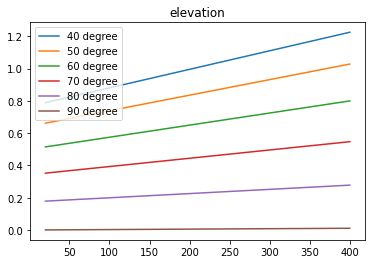

In [26]:
dd = range (20, 401, 20)
zz = range (40, 91, 10)
for z in zz:
    ll = [mean_error(d, 0, z) for d in dd]
    plt.plot(dd, [l[2] for l in ll], label=f"{z} degree")
    #for d in dd:
        #l = mean_error(d, 0, z)
        #print(f"{d}, {z}, {l[0]:.1f}, {l[1]:.1f}, {l[2]:.1f}")
plt.title('elevation')
plt.legend()

Propagation of error for trigonometric levelling

$\Delta h = SD_1 * cos(z_1) - SD_0 * cos(z_0)$

$ \frac {\partial {\Delta h}} {\partial {SD_1}} = cos(z_1)$

$ \frac {\partial {\Delta h}} {\partial {z_1}} = -SD_1 * sin(z_1)$

$ \frac {\partial {\Delta h}} {\partial {SD_0}} = -cos(z_0)$

$ \frac {\partial {\Delta h}} {\partial {z_0}} = SD_0 * sin(z_0)$


$m_{\Delta h} = \sqrt{cos(z_1)^2 * m_{SD_1}^2 + SD_1^2 * sin(z_1)^2 * \frac {m_z^2} {\rho^2} + cos(z_0)^2 * m_{SD_0}^2 + SD_0^2 * sin(z_0)^2 * \frac {m_z^2} {\rho^2} } $

In [ ]:
SD0 = SD1 = 100 # slope distance metres
z0 = z1 = 80 / 180 * pi   # zenith angle degree
mz = 1          # mean error for zenith angle seconds
mDZ = 0.001     # mean error for slope distance metres
rho = 180 * 60 * 60 / pi
mdh = sqrt(cos(z1)**2 * mDZ**2 + SD1**2 * sin(z1)**2 * (mz / rho)**2 +
           cos(z0)**2 * mDZ**2 + SD0**2 * sin(z0)**2 * (mz / rho)**2)
print(f"{mdh*1000:.1f} mm")

0.7 mm


Supposing SD1 = SD0 and z1 = z0


In [ ]:
dist = range(20, 201, 20)
mdh = []
z = 80 / 180 * pi
for SD in dist:
    mdh.append(sqrt(2 * cos(z)**2 * mDZ**2 + SD**2 * sin(z)**2 * (mz / rho)**2) * 1000)
print([f"{m:.1f} " for m in mdh])

['0.3 ', '0.3 ', '0.4 ', '0.5 ', '0.5 ', '0.6 ', '0.7 ', '0.8 ', '0.9 ', '1.0 ']


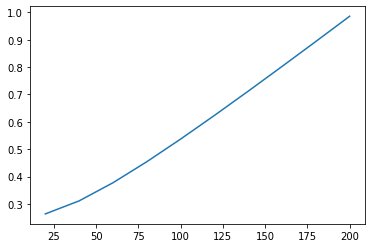

In [ ]:
plt.plot(dist, mdh)